<h1> Project Final Report</h1>
<h3>Group 004_28 </h3>

<h2>Introduction</h2>

<h3>Background</h3>

The Pacific Laboratory for Artificial Intelligence (PLAI) is a research group in computer science at UBC. They have a Minecraft server, PLAIcraft, where they record players' actions as they navigate the virtual world. The research group would like to target their PLAIcraft recruitment efforts and ensure they have enough resources to handle the number of players they attract. 

This report explores the question "*What *kinds* of players are most likely to contribute a large amount of data?*"</br> 
Specifically, our group is interested in learning how a **player's age** might be related to **how much data they contribute** (i.e. total played hours). 

<h3>Summary of Datasets</h3>
The provided data consists of two csv files, 'Players' (9 variables, 196 observations), and 'Sessions' (5 variables, 1535 observations). Both are summarized below.

<h4>Players</h4> 

<div style="display: inline-block">  
    
| Variable         | Type of Data*         | Interpretation | Options / Other Notes|
| ------------------- | --------------------- | -------------------- | ------- |
| *experience*          | categorial - ordinal  | experience level of player, selected by player | *Beginner, Amateur, Regular, Pro, Veteran* |
| *hashedEmail*         | character             | email address of player in hashed form | e.g. *f6daba428a5e19a3d47574858c135*... |
| *name* | character | pseudonym chosen by player | Many options were provided to players. Given this, it makes sense to treat this as character, not factor. |
| *gender* | categorial | gender of player, selected by the player | *Male, Female, Non-binary, Agender, Two-Spirited, Other, Prefer not to say* |
| *played_hours* | double | number of hours player has played on server, to one decimal place | e.g. *22.5* |
| *age* | double | age of player, selected by the player | e.g. *30* |
| *subscribe* | logical | a boolean indicating whether player subscribed to PlaiCraft  updates | *TRUE, FALSE* | 
| *individualId* | double | unique number identifying player | Note that this column contains only *N/A*. |
| *organizationName* | character | organization as indicated by player | Note that this column contains only *N/A*. |
</div>

\* Represents most appropriate type, not the type initially assigned by R.
<br />

<h4>Sessions</h4> 

<div style="display: inline-block"> 
    
| Variable                 | Type of Data* | Interpretation                           | Other Notes |
| ------------------------ | ------------- | ---------------------------------------- | ----------- |
| *hashed_Email*           | character | email address of player in hashed form | e.g. *50499be23603422e6a0ee97...* |
| *start_time*             | character | date, time Plaicraft session began | e.g. *30/06/2024 18:12* |
| *end_time*               | character | date, time  Plaicraft session finished | e.g. *30/06/2024 18:24* |
| *original_start_time*    | double        | UNIX timestamp of session start | e.g. *1.71977E+12* |
| *original_end_time*      | double        | UNIX timestamp of session end | e.g. *1.71977E+12* |

</div>

<h2>Method & Results</h2>

<h3>Loading Data</h3>

First, we load the necessary libraries, then read the datasets from their URLs.

In [2]:
library(tidyverse)
library(tidymodels)
library(repr)

players <- read_csv("https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz")
sessions <- read_csv("https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

<h3>Wrangling & Cleaning Data</h3>

Then, we remove the `individualId` and the `organizationName` columns in the `players` data frame, since all values in these columns are N/A.

In [3]:
players <- players |>
select(-individualId, -organizationName)

Next, we redefine the `experience` and `gender` columns as **factors** using the `as_factor` function, so that these variables will be treated as categorical.

In [4]:
players <- players |>
mutate(experience = as_factor(experience)) |>
mutate(gender = as_factor(gender))

We also create a new `sessions_sum` data frame using `group_by` and `summarise`.
This shows us the number of sessions per hashed email, i.e. the number of sessions per individual.

In [5]:
sessions_sum <- sessions |>
group_by(hashedEmail) |>
summarise(number_of_sessions = n())

head(sessions_sum)

hashedEmail,number_of_sessions
<chr>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,13
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,2
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,1


**Table 1. Hashed Email & Number of Sessions**
(Only the head is displayed for the sake of readability.)

Next, we bind this data frame with the `players` data frame, using `left_join`. This brings together all required variables.  This way, we can use just one data frame for all subsequent analysis steps.

In [7]:
data <- left_join(players, sessions_sum, by = "hashedEmail")

head(data)

experience,subscribe,hashedEmail,played_hours,name,gender,age,number_of_sessions
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA


**Table 2. Dataframe of all players variables**
(Only the head is displayed for the sake of readability.)

<h3>Data Analysis</h3>

We start our data analysis by setting the seed. Then we split the data into training and testing sets, in a 70:30 ratio.

In [8]:
set.seed(2000) 

data_split <- initial_split(data, prop = 0.7, strata = age)
data_training <- training(data_split)
data_testing <- testing(data_split)

Before creating a model, we make a **scatterplot** using `ggplot`, to see if there seems to be a relationship between the `age` and `played_hours` variables.

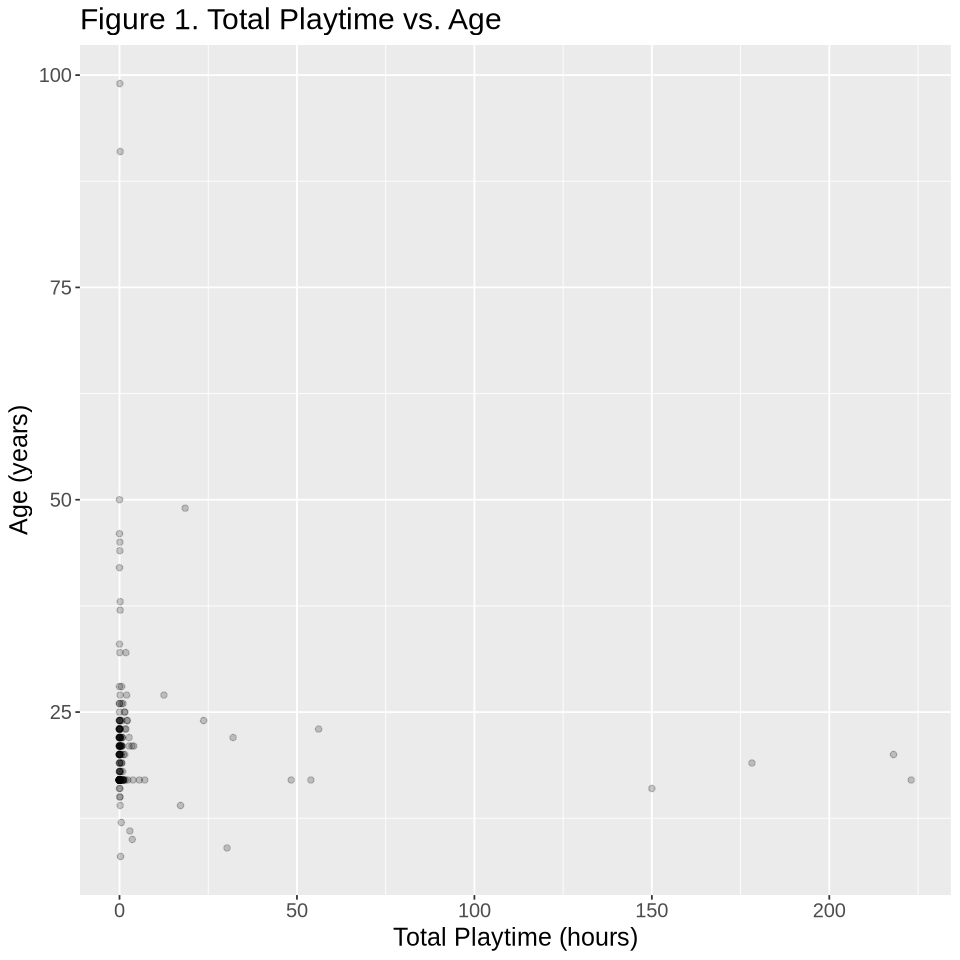

In [9]:
options(repr.plot.width = 8, repr.plot.height = 8)

age_playtime <- data |>
ggplot(aes(x = played_hours, y = age)) +
geom_point(alpha = 0.2) +
labs(x = "Total Playtime (hours)", y = "Age (years)") +
ggtitle("Figure 1. Total Playtime vs. Age") +
theme(text = element_text(size = 15))

age_playtime

**Figure 1. Total Playtime vs. Age **

From this figure, we can conclude that the dataset includes mostly players who are young (< 30 years) and play very few hours. Among the players that *do* play many hours (e.g. more than 25 hours), most of them are young (< 30 years).

From the figure, the relationship is not especially clear, but perhaps it could be weakly linear. There seem to be a few outliers (e.g. an individual who has played nearly 250 hours) and a lot of zero-hour plays. A **negative relationship** between *age* and *played_hours* is still somewhat visible on the scatterplot.

We would like to further explore the relationship between `age` and `played_hours`. Since both variables are numeric, and we see a slight indication of a linear relationship, we'll try a **linear regression**. Since we would like to know the characteristics of players that contribute a large amount of data, we will create a model that predicts `age` using `played_hours`. If our model is accurate-- in other words, if the $RMSE$ and $RMSPE$ are low enough-- we will conclude that player's *age* can help us to predict their *played hours*.

In this step, we will:

- create a linear regression model specification, named `lm_spec`
- create a recipe for `lm_spec`, named `data_recipe`
- fit the model specification and recipe in a workflow, named `data_fit`

In [10]:
lm_spec <- linear_reg() |> 
       set_engine("lm") |>
       set_mode("regression")

data_recipe <- recipe(age ~ played_hours, data = data_training)

data_fit <- workflow() |>
       add_recipe(data_recipe) |>
       add_model(lm_spec) |>
       fit(data = data_training)

data_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)  played_hours  
    21.69401      -0.02578  


<br>
The equation of the line indicates that when played_hours is 0, the predicated age is 22. From the y-intercept (age) of 22, the average player's age decreases, at the rate of 0.02578 years per hour of playtime.

<br>
<br>
Next, we will calculate the $RMSE$ to assess the goodness of fit on `data_fit`.

Note that this is going to tell us how well the model predicts the **training data** used to fit the model.

In [11]:
lm_rmse <- data_fit |>
         predict(data_training) |>
         bind_cols(data_training) |>
         metrics(truth = age, estimate = .pred) |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()

lm_rmse

[1] 11.02085

The $RMSE$ of 11.02 tells us that the training data points on the scatterplot were off by an average distance of 11.02 years from the line of best fit.

Let's calculate the $RMSPE$ by doing the same process on the **testing data**.

In [12]:
lm_rmspe <- data_fit |>
         predict(data_testing) |>
         bind_cols(data_testing) |>
         metrics(truth = age, estimate = .pred) |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()

lm_rmspe

[1] 5.783111

The $RMSPE$ of 5.78 tells us that the training data points on the scatterplot were off by an average distance of 5.78 years from the line of best fit.

Especially considering the dataset mostly consists of players < 30 years, a 5.78 difference in predicted age is substantial. Using `played_hours` as a predictor does not result in a particularily accurate prediction.

The outliers mentioned earlier (i.e. points of astonishingly high play times and points of surprisingly advanced age) may contribue to this. Let's identify them, by ordering the data frame in **descending order** for each variable, using the `arrange` function.

In [13]:
data_age_desc <- arrange(data, desc(age))
head(data_age_desc)

experience,subscribe,hashedEmail,played_hours,name,gender,age,number_of_sessions
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<int>
Regular,TRUE,7d71c49cbbce8dcf0276b2bfecfa2d16f22cb31a4024556d6085884298f2ee8d,0.1,Devin,Two-Spirited,99,1
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,1
Regular,FALSE,7b17513f11968feaf6b02977885c436dc2a4549489ca25ef03022f9fbae19d81,0.0,Balthazar,Male,50,1
Regular,TRUE,c57fa94e436cf49a929d0168e47d26fec3d900b321775e280ef136979c01d5a4,18.5,Dante,Male,49,16
Veteran,FALSE,4c0662a559f9d83b4d84ce3d86e6577c9f7a426c80465c6174321afd96664da5,0.0,Selena,Male,46,NA
Amateur,FALSE,6fa105fac7f4f37350f21830db78cde153d8edda41d6f4f2d48c9785d605c5e5,0.1,Yosef,Male,45,1


**Table 2. All Players, in descending order of `age`**\
(Only the head is displayed for the sake of readability.)

In [14]:
data_playtime_desc <- arrange(data, desc(played_hours))
head(data_playtime_desc)

experience,subscribe,hashedEmail,played_hours,name,gender,age,number_of_sessions
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<int>
Regular,TRUE,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,Hiroshi,Male,17,219
Regular,TRUE,b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,Akio,Non-binary,20,95
Regular,TRUE,ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,178.2,Piper,Female,19,147
Amateur,TRUE,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,150.0,Delara,Female,16,159
Amateur,TRUE,fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,56.1,Dana,Male,23,310
Amateur,TRUE,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,53.9,Alex,Male,17,130


**Table 3. All Players, in descending order of `played_hours`**
(Only the head is displayed for the sake of readability.)

We can see that players **Devin, Ahmed, Hiroshi, Akio, Piper and Delara** have either (1) playtimes that are orders of magnitude higher than most of the players, or (2) a very advanced age, compared to most other players. This may be affecting our model's accuracy.

We delete them from the data frame using the `filter` function.

In [37]:
outliers <- c("Devin", "Ahmed", "Hiroshi", "Akio", "Piper", "Delara")

ref_data <- filter(data, !name %in% outliers)
head(ref_data)

experience,subscribe,hashedEmail,played_hours,name,gender,age,number_of_sessions
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA


**Table 4. Dataframe of all player data, with outliers removed**

Using this refined data frame, we will now repeat the entire process (except creating the recipe, since that is identical) and calculate its $RMSE$ and $RMSPE$.

In [104]:
set.seed(1999)

ref_data_split <- initial_split(ref_data, prop = 0.7, strata = age)
ref_data_training <- training(ref_data_split)
ref_data_testing <- testing(ref_data_split)

ref_data_recipe <- recipe(age ~ played_hours, data = ref_data_training)

ref_data_fit <- workflow() |>
       add_recipe(ref_data_recipe) |>
       add_model(lm_spec) |>
       fit(data = ref_data_training)

ref_data_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)  played_hours  
     20.9246        0.0237  


In [102]:
ref_lm_rmse <- ref_data_fit |>
         predict(ref_data_training) |>
         bind_cols(ref_data_training) |>
         metrics(truth = age, estimate = .pred) |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()

ref_lm_rmse

[1] 6.499313

In [103]:
ref_lm_rmspe <- ref_data_fit |>
         predict(ref_data_testing) |>
         bind_cols(ref_data_testing) |>
         metrics(truth = age, estimate = .pred) |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()

ref_lm_rmspe

[1] 5.547639

Nice! The calculated $RMSE$ and $RMSPE$ values are both lower than their previous values. The $RMSPE$ value of 5.55 is slightly more accurate!

This tells us that there is a **negative** relationship between `age` and `playtime`.

<h2>Discussion</h2> 

#### Summary of analysis and findings ####

Based on our exploratory data analysis, we predicted a relationship between the age of the player and the total number of hours played. Based on that intuition, we created a linear regression model, where the predictor variable was the total number of hours played (`played_hours`) and the predictor variable was the age of the player (`age`). 

To test the performance of the model, we used the training model to predict age from the test data, and calculated the $RMSPE$. The model had an $RMSPE$ of 5.36. 

This $RMSPE$ indicates that **there is a negative relationship between age and total played hours**. Looking back Figure 1, we can see that **players younger than ~25 years are likely to contribute the most playtime**. 

#### Expectations ####

The results aligned with our expectations. Given that the linear relationship appeared weak in our exploratory analysis, we did not have expectations of a particularly low RMSPE. The linear regression indicated that there exists a relationship between age and total play time, which we expected. 

Our results also connect to our expectations based on our day-to-day experiences. We’d expect young adults might be most likely to engage in video games (such as PLAICraft) compared to other age groups. 

#### Impact of the findings #### 

The research team might use this information in their recruitment, in order to develop tailored marketing strategies. They can target people less than 25 years old (range around the intercept calculated from REFINED workflow), since they are likely to play for the greatest total number of hours. Knowing young adult participants are most likely to contribute large amounts of data, the researchers could e.g. advertise their study in locations that young adults frequent. 

#### Future questions #### 

Our findings lead to several more questions:

* How can the game be developed to cater specifically to the target audience? 